# AS09p Youtube comment clustering

在AS06萃取關鍵字的練習中，我們曾使用反送中相關影片之留言共八千則作為範例。這次的作業將邀請你使用該筆資料，先篩檢關鍵字，再透過群集法，嘗試找出留言有哪些主題、立場、或者網民討論的面向等等。這次的作業是開放式的結果，也就是每個人所找出來的主題或立場等可能不太一樣，但目標是一致的，找出這些文本裡面有哪些主題、在討論什麼。這種問問題的方式其實也出現在不少專題組別中。你在寫作業的過程，應該會不斷地感受到，這怎麼抽得出來主題？這真的抽得出來嗎？這樣抽出來的主題有效嗎？有意義嗎？然後為了獲得能說服自己的主題，你可能會不斷反覆篩選這些留言，卻又會遇到對代表性的質疑，也就是，縮減到這麼小的資料集合，做出來的結果會有代表性嗎？

所以這個作業有個目的是先讓你透過做作業了解到，如果你做的專題是想回答「這些文本裡面有哪些主題」，很可能會遇到什麼樣的問題。

本週的作業程式碼無特殊規定，要怎麼處理這些資料，或者要怎麼解釋跑出來的東西，都

## (TODO) Answer the following questions

### (TODO)Document filtering strategies
目前作業給的資料一共有8000筆留言，每筆留言的欄位有發佈時間、更新時間、按讚數、也可以計算留言的字數，請問你採用了什麼樣的篩選策略？請於以下的文字框回答（編輯下方Markdown，需說明至少五個連續處理過程）。這種過程的書寫通常會出現在論文或者研究報告中，或者出現在學術海報的一小塊paragraph。

答: 從1-5按順序操作
1. 原資料有8000筆留言
2. 篩除點讚數為零的留言後，剩下4284筆留言
3. 篩除留言字數少於10字的評論後，剩下3613筆留言
4. 剔除發布時間位於2019-06-09(反送中大規模爆發)以前的留言，剩下3564筆留言
5. 剔除發布時間不等於更新時間的留言，剩下3252筆留言

### (TODO)Vocabulary filtering strategies
在教學範例中，我們介紹不少Strategy來篩選不必要或必要的文字，請問你怎麼做關鍵字篩選？

答: 從1-5按順序操作，將字詞轉為簡體字jieba斷詞(呈現效果遠優於繁體字)
1. 原始資料在斷詞後共有7641個相異字詞。（規定填寫）
2. 在經過移除標點符號後，剩下7640個相異字詞(推測是tfidf本來就會過濾標點符號)。（規定填寫）。
3. 經過移除英文與數字、空白、表情符號後，剩下7185個相異字詞。
4. 移除停用詞與長度為1的字詞後，剩下6972個相異字詞。
5. 將剩下的字詞進行tf-idf加權，過濾掉在90%留言中皆頻繁出現的字詞，並設定bigram，共有23191個相異字詞。

※備註此處的原始資料乃經過文件過濾者，共有3252筆留言。

## 1. Loading youtube data

### by colab

In [ ]:
!wget https://github.com/P4CSS/PSS/blob/master/data/yt-comment-antiELAB.xlsx?raw=true -O yt-comment-antiELAB.xlsx
import pandas as pd
df = pd.read_excel('yt-comment-antiELAB.xlsx') 
df

### by local notebook

In [1]:
import pandas as pd
df = pd.read_excel('../data/yt-comment-antiELAB.xlsx')
df

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....\n這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z
4,2_tXjqhbe5E,Ugyb-ogACbZWVewnU-94AaABAg,NaN,Kitty Wong,仆街鄭,0,2020-04-06T15:20:34Z,2020-04-06T15:20:34Z
...,...,...,...,...,...,...,...,...
7995,ySMAcMAL6rY,UgzU9oD5I6q1qHLzx_B4AaABAg,NaN,nova lee,自己不是會算嗎,1,2019-08-22T04:00:31Z,2019-08-22T04:00:31Z
7996,zHlhQoT9OF0,Ugz2ff-Be0yCoEUY-Rd4AaABAg,NaN,the world Rock,常德說的真好,3,2020-04-10T03:21:34Z,2020-04-10T03:21:34Z
7997,zQWzh4yj_g8,Ugwex9I2lZWa-DgeWrx4AaABAg,NaN,Zoe Su,自私的人多的是，水準就和中國人一樣,1,2020-02-12T22:13:24Z,2020-02-12T22:13:24Z
7998,zQWzh4yj_g8,UgxpokMr9hHK0Ugcvl94AaABAg,NaN,非也非也,人都自私自利的，適者生存，不適者自己想辦法，沒有人會幫的，靠自己最實在,0,2020-02-12T04:53:28Z,2020-02-12T04:53:28Z


## 2. Data Preprocessing

### 清除換行符號與網址

In [2]:
import re
df['textOriginal'] = df.textOriginal.str.replace(r'\n', "").str.replace(r'(www|http:|https:)+[^\s]+[\w]', '')
df

C:\Users\user\AppData\Local\Temp/ipykernel_26212/3700573777.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['textOriginal'] = df.textOriginal.str.replace(r'\n', "").str.replace(r'(www|http:|https:)+[^\s]+[\w]', '')


,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z
2,2_tXjqhbe5E,UgyVlhx36V2XWLOM9MZ4AaABAg,NaN,Ally,Zoom把客戶資料洩給中國，現在紐約市已不讓學生用這系統視訊上課了!,0,2020-04-06T19:54:04Z,2020-04-06T19:54:04Z
3,2_tXjqhbe5E,Ugz4v7OudQxaDXYyegZ4AaABAg,NaN,Ally,法國人執行居家避疫比起美國比較確實，外出還要有通行證,0,2020-04-06T19:18:24Z,2020-04-06T19:18:24Z
4,2_tXjqhbe5E,Ugyb-ogACbZWVewnU-94AaABAg,NaN,Kitty Wong,仆街鄭,0,2020-04-06T15:20:34Z,2020-04-06T15:20:34Z
...,...,...,...,...,...,...,...,...
7995,ySMAcMAL6rY,UgzU9oD5I6q1qHLzx_B4AaABAg,NaN,nova lee,自己不是會算嗎,1,2019-08-22T04:00:31Z,2019-08-22T04:00:31Z
7996,zHlhQoT9OF0,Ugz2ff-Be0yCoEUY-Rd4AaABAg,NaN,the world Rock,常德說的真好,3,2020-04-10T03:21:34Z,2020-04-10T03:21:34Z
7997,zQWzh4yj_g8,Ugwex9I2lZWa-DgeWrx4AaABAg,NaN,Zoe Su,自私的人多的是，水準就和中國人一樣,1,2020-02-12T22:13:24Z,2020-02-12T22:13:24Z
7998,zQWzh4yj_g8,UgxpokMr9hHK0Ugcvl94AaABAg,NaN,非也非也,人都自私自利的，適者生存，不適者自己想辦法，沒有人會幫的，靠自己最實在,0,2020-02-12T04:53:28Z,2020-02-12T04:53:28Z


### 篩選dataframe: document filtering

In [3]:
import datetime
filter1 = (df['likeCount'].apply(lambda x: int(x) > 0))
filter2 = (df['textOriginal'].apply(lambda x: len(str(x)) > 10))
filter3 = (pd.to_datetime(df['publishedAt']).apply(lambda x: x > '2019-06-09'))
filter4 = (pd.to_datetime(df['publishedAt']) == pd.to_datetime(df['updatedAt']))

df1 = df.loc[filter1]
df2 = df1.loc[filter2]
df3 = df2.loc[filter3]
df4 = df3.loc[filter4]

print(len(df), len(df1), len(df2), len(df3), len(df4))

8000 4284 3613 3564 3252


### 中文斷詞

In [4]:
import jieba
from hanziconv import HanziConv
df4['tokenized_text'] = df4['textOriginal'].apply(lambda x:list(jieba.cut(HanziConv.toSimplified(x))))
df4 = df4.reset_index(drop = True)
df4

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 1.646 seconds.
Prefix dict has been built successfully.
C:\Users\user\AppData\Local\Temp/ipykernel_26212/1475085127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['tokenized_text'] = df4['textOriginal'].apply(lambda x:list(jieba.cut(HanziConv.toSimplified(x))))


,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,tokenized_text
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[郑, 大哥, 和, 吉雷米, 的, 互动, 很, 可爱, ，, 欢迎, 加入, 台湾, 这..."
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 掩, ....., 这高雄, 老外, 的, 台语, 能力, 应该, 比, 台北人, 好]"
2,2_tXjqhbe5E,Ugyxd_mQmN0fV45p-kF4AaABAg,NaN,李珈霈,"武漢病毒真的讓人很傷腦筋,無恐不入，目前全世界傳染成這樣讓人感覺不知道如何是好，這個病毒何時...",1,2020-04-06T03:45:08Z,2020-04-06T03:45:08Z,"[武汉, 病毒, 真的, 让, 人, 很, 伤脑筋, ,, 无恐, 不入, ，, 目前, 全..."
3,2_tXjqhbe5E,Ugxi855IBZyzZWjNNJ14AaABAg,NaN,Alonso智真,因為很多人的懦弱、貪婪、無知和長期以來被邪惡無恥的大外宣洗腦，而導致縱容殘暴的獨裁者和一小群...,2,2020-04-04T06:07:49Z,2020-04-04T06:07:49Z,"[因为, 很多, 人, 的, 懦弱, 、, 贪婪, 、, 无知, 和, 长期以来, 被, 邪..."
4,2_tXjqhbe5E,UgyhGuvlCB4QkA2GfSF4AaABAg,NaN,L S,線上會議軟體很多，請大家絕對不要選擇zoom！！！此軟體創辦人所有研發人員皆在中國，如同華為...,9,2020-04-03T21:38:46Z,2020-04-03T21:38:46Z,"[线上, 会议, 软体, 很多, ，, 请, 大家, 绝对, 不要, 选择, zoom, ！..."
...,...,...,...,...,...,...,...,...,...
3247,yPq9i8B_jyY,UgymKJwYsoZdcyq0BX94AaABAg,NaN,黃淑貞,婆佑真了不起是一位好媳婦,2,2019-08-30T03:27:43Z,2019-08-30T03:27:43Z,"[婆佑真, 了不起, 是, 一位, 好, 媳妇]"
3248,yPq9i8B_jyY,UgyczSNVUmZaZ8PFTd14AaABAg,NaN,Linmei Chen,姿佑真的是賢明主婦讚！,3,2019-08-29T10:05:13Z,2019-08-29T10:05:13Z,"[姿佑, 真的, 是, 贤明, 主妇, 赞, ！]"
3249,yRYyE05HmeY,UgzdZN41Tou01ZQD_md4AaABAg,NaN,陳文,"一直在等,57歲了,為什麼總是沒有遇見親眼見證或可以說服自己的所謂靈界事件",1,2019-08-24T05:25:13Z,2019-08-24T05:25:13Z,"[一直, 在, 等, ,, 57, 岁, 了, ,, 为什么, 总是, 没有, 遇见, 亲眼..."
3250,yRYyE05HmeY,UgzdZN41Tou01ZQD_md4AaABAg,NaN,陳文,"一直在等,57歲了,為什麼總是沒有遇見親眼見證或可以說服自己的所謂靈界事件",1,2019-08-24T05:25:13Z,2019-08-24T05:25:13Z,"[一直, 在, 等, ,, 57, 岁, 了, ,, 为什么, 总是, 没有, 遇见, 亲眼..."


## 3. Feature selections - selecting Model

### Model1.0: 原始資料建模

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
documents = [" ".join(doc) for doc in df4['tokenized_text']]
tfidf_model0 = TfidfVectorizer().fit(documents)
print(len(tfidf_model0.vocabulary_))
# print(tfidf_model0.vocabulary_)

7641


### Model1.1: 移除標點符號

In [6]:
from zhon.hanzi import punctuation
import unicodedata

def removealPuncSpace(words):
    noPuncSpace = []
    for word in words:
        if word != " " and not unicodedata.category(word[0]).startswith('P'):
            noPuncSpace.append(word)
    return noPuncSpace

df4['tokenized_text'] = df4['tokenized_text'].apply(lambda x: removealPuncSpace(x))
documents = [" ".join(doc) for doc in df4['tokenized_text']]

tfidf_model1 = TfidfVectorizer(stop_words = list(punctuation)).fit(documents)
print(len(tfidf_model1.vocabulary_))

7640


### Model1.2: 移除英文與數字

In [7]:
def removeAlphaNum(words):
    noAlphaNum = []
    for word in words:
        if re.sub('[a-zA-Z]+|[0-9.]+', "", word) != "" and word.encode('UTF-8').isalnum()==False:
            noAlphaNum.append(word)
    return noAlphaNum

df4['tokenized_text'] = df4['tokenized_text'].apply(lambda x: removeAlphaNum(x))
documents = [" ".join(doc) for doc in df4['tokenized_text']]

tfidf_model2 = TfidfVectorizer().fit(documents)
print(len(tfidf_model2.vocabulary_))

7185


### Model1.3: 移除停用字與長度為1的字詞

In [8]:
with open("../data/stopwords-zh-china.txt", encoding="utf-8") as fin:
    stopwords = fin.read().split("\n")[1:]
# print(stopwords)

In [9]:
def remove_stopWords(words):
    noStop = []
    for word in words:
        if word not in stopwords and len(word) > 1:
            noStop.append(word)
    return noStop

df4['tokenized_text'] = df4['tokenized_text'].apply(lambda x: remove_stopWords(x))
documents = [" ".join(doc) for doc in df4['tokenized_text']]

tfidf_model3 = TfidfVectorizer(stop_words = stopwords).fit(documents)
print(len(tfidf_model3.vocabulary_))

6972


### Model1.4: Tf-Idf權重篩選，並設定bigram

In [10]:
tfidf_model4 = TfidfVectorizer(stop_words = stopwords, 
                               max_df = 0.1, ngram_range = (1, 2)).fit(documents)
print(len(tfidf_model4.vocabulary_))

# Transform
X = tfidf_model4.transform(documents)
X.shape

23191


(3252, 23191)

## 4. Clustering

### Evaluating

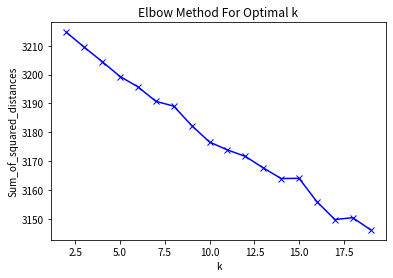

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,20)

for k in K:
    km = KMeans(
        n_clusters=k, # 預設有 k個起始點做為 k個 clusters的 centroids
        max_iter=200, # iteration要重複幾次才能讓 squared point-centroid distance converged (1次 iteration會計算哪些資料點與起始 centroids距離最近，並依據這些資料點更新 centorids位置)
        n_init=10 # 對於每一個 k，要從新初始化幾次
    )
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

# 如果曲線不夠平緩就代表 clustering的效果不好    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Final clustering by k=?

In [12]:
true_k = 8
model = KMeans(n_clusters = true_k, 
               init = 'k-means++', 
               max_iter = 200, 
               n_init = 10, random_state = 5)
model.fit(X)
labels = model.labels_
df4['cluster'] = labels
df4

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,tokenized_text,cluster
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[大哥, 吉雷米, 互动, 可爱, 欢迎, 加入, 台湾, 温馨, 家庭]",0
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 这高雄, 老外, 台语, 能力, 应该, 台北人]",0
2,2_tXjqhbe5E,Ugyxd_mQmN0fV45p-kF4AaABAg,NaN,李珈霈,"武漢病毒真的讓人很傷腦筋,無恐不入，目前全世界傳染成這樣讓人感覺不知道如何是好，這個病毒何時...",1,2020-04-06T03:45:08Z,2020-04-06T03:45:08Z,"[武汉, 病毒, 真的, 伤脑筋, 无恐, 不入, 目前, 全世界, 传染, 感觉, 知道,...",5
3,2_tXjqhbe5E,Ugxi855IBZyzZWjNNJ14AaABAg,NaN,Alonso智真,因為很多人的懦弱、貪婪、無知和長期以來被邪惡無恥的大外宣洗腦，而導致縱容殘暴的獨裁者和一小群...,2,2020-04-04T06:07:49Z,2020-04-04T06:07:49Z,"[很多, 懦弱, 贪婪, 无知, 长期以来, 邪恶, 无耻, 外宣, 洗脑, 导致, 纵容,...",0
4,2_tXjqhbe5E,UgyhGuvlCB4QkA2GfSF4AaABAg,NaN,L S,線上會議軟體很多，請大家絕對不要選擇zoom！！！此軟體創辦人所有研發人員皆在中國，如同華為...,9,2020-04-03T21:38:46Z,2020-04-03T21:38:46Z,"[线上, 会议, 软体, 很多, 绝对, 不要, 选择, 软体, 创办人, 研发, 人员, ...",0
...,...,...,...,...,...,...,...,...,...,...
3247,yPq9i8B_jyY,UgymKJwYsoZdcyq0BX94AaABAg,NaN,黃淑貞,婆佑真了不起是一位好媳婦,2,2019-08-30T03:27:43Z,2019-08-30T03:27:43Z,"[婆佑真, 了不起, 一位, 媳妇]",0
3248,yPq9i8B_jyY,UgyczSNVUmZaZ8PFTd14AaABAg,NaN,Linmei Chen,姿佑真的是賢明主婦讚！,3,2019-08-29T10:05:13Z,2019-08-29T10:05:13Z,"[姿佑, 真的, 贤明, 主妇]",0
3249,yRYyE05HmeY,UgzdZN41Tou01ZQD_md4AaABAg,NaN,陳文,"一直在等,57歲了,為什麼總是沒有遇見親眼見證或可以說服自己的所謂靈界事件",1,2019-08-24T05:25:13Z,2019-08-24T05:25:13Z,"[一直, 总是, 没有, 遇见, 亲眼, 见证, 说服, 所谓, 灵界, 事件]",7
3250,yRYyE05HmeY,UgzdZN41Tou01ZQD_md4AaABAg,NaN,陳文,"一直在等,57歲了,為什麼總是沒有遇見親眼見證或可以說服自己的所謂靈界事件",1,2019-08-24T05:25:13Z,2019-08-24T05:25:13Z,"[一直, 总是, 没有, 遇见, 亲眼, 见证, 说服, 所谓, 灵界, 事件]",7


## 5. Visualization

### 降維: 奇異值分解

In [13]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2, n_iter = 7, random_state = 1)
points = svd.fit_transform(X)
points[:10]

array([[ 0.0158458 ,  0.0017739 ],
       [ 0.01814064,  0.00192215],
       [ 0.09548914,  0.00316602],
       [ 0.0422292 , -0.00078635],
       [ 0.07442746, -0.00077188],
       [ 0.01995277,  0.00255313],
       [ 0.02718194, -0.00132521],
       [ 0.01468157,  0.00119258],
       [ 0.02248442, -0.00012454],
       [ 0.05726146, -0.00529562]])

In [14]:
df_point = pd.DataFrame(points, columns = ['x', 'y'])
df_merge = pd.concat([df4, df_point], axis = 1)
df_merge

,videoId,commentId,parentId,authorDisplayName,textOriginal,likeCount,publishedAt,updatedAt,tokenized_text,cluster,x,y
0,2_tXjqhbe5E,UgwQIF9qNqGydjE2NkN4AaABAg,NaN,CHI-HAU CHEN,鄭大哥和吉雷米的互動很可愛，歡迎加入台灣這個溫馨的家庭喔~~~~,19,2020-04-02T01:40:29Z,2020-04-02T01:40:29Z,"[大哥, 吉雷米, 互动, 可爱, 欢迎, 加入, 台湾, 温馨, 家庭]",0,0.015846,0.001774
1,2_tXjqhbe5E,UgwuP0Jva-U69xTMaEF4AaABAg,NaN,Funky Duck,牛嘴掩.....這高雄老外的台語能力應該比台北人好,1,2020-04-07T04:36:37Z,2020-04-07T04:36:37Z,"[牛嘴, 这高雄, 老外, 台语, 能力, 应该, 台北人]",0,0.018141,0.001922
2,2_tXjqhbe5E,Ugyxd_mQmN0fV45p-kF4AaABAg,NaN,李珈霈,"武漢病毒真的讓人很傷腦筋,無恐不入，目前全世界傳染成這樣讓人感覺不知道如何是好，這個病毒何時...",1,2020-04-06T03:45:08Z,2020-04-06T03:45:08Z,"[武汉, 病毒, 真的, 伤脑筋, 无恐, 不入, 目前, 全世界, 传染, 感觉, 知道,...",5,0.095489,0.003166
3,2_tXjqhbe5E,Ugxi855IBZyzZWjNNJ14AaABAg,NaN,Alonso智真,因為很多人的懦弱、貪婪、無知和長期以來被邪惡無恥的大外宣洗腦，而導致縱容殘暴的獨裁者和一小群...,2,2020-04-04T06:07:49Z,2020-04-04T06:07:49Z,"[很多, 懦弱, 贪婪, 无知, 长期以来, 邪恶, 无耻, 外宣, 洗脑, 导致, 纵容,...",0,0.042229,-0.000786
4,2_tXjqhbe5E,UgyhGuvlCB4QkA2GfSF4AaABAg,NaN,L S,線上會議軟體很多，請大家絕對不要選擇zoom！！！此軟體創辦人所有研發人員皆在中國，如同華為...,9,2020-04-03T21:38:46Z,2020-04-03T21:38:46Z,"[线上, 会议, 软体, 很多, 绝对, 不要, 选择, 软体, 创办人, 研发, 人员, ...",0,0.074427,-0.000772
...,...,...,...,...,...,...,...,...,...,...,...,...
3247,yPq9i8B_jyY,UgymKJwYsoZdcyq0BX94AaABAg,NaN,黃淑貞,婆佑真了不起是一位好媳婦,2,2019-08-30T03:27:43Z,2019-08-30T03:27:43Z,"[婆佑真, 了不起, 一位, 媳妇]",0,0.011907,0.000680
3248,yPq9i8B_jyY,UgyczSNVUmZaZ8PFTd14AaABAg,NaN,Linmei Chen,姿佑真的是賢明主婦讚！,3,2019-08-29T10:05:13Z,2019-08-29T10:05:13Z,"[姿佑, 真的, 贤明, 主妇]",0,0.052317,-0.008317
3249,yRYyE05HmeY,UgzdZN41Tou01ZQD_md4AaABAg,NaN,陳文,"一直在等,57歲了,為什麼總是沒有遇見親眼見證或可以說服自己的所謂靈界事件",1,2019-08-24T05:25:13Z,2019-08-24T05:25:13Z,"[一直, 总是, 没有, 遇见, 亲眼, 见证, 说服, 所谓, 灵界, 事件]",7,0.056477,0.045529
3250,yRYyE05HmeY,UgzdZN41Tou01ZQD_md4AaABAg,NaN,陳文,"一直在等,57歲了,為什麼總是沒有遇見親眼見證或可以說服自己的所謂靈界事件",1,2019-08-24T05:25:13Z,2019-08-24T05:25:13Z,"[一直, 总是, 没有, 遇见, 亲眼, 见证, 说服, 所谓, 灵界, 事件]",7,0.056477,0.045529


### bokeh視覺化

In [15]:
from bokeh.models import ColumnDataSource, Label, LabelSet, Range1d
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [16]:
def generate_color(x, total):
    def color_red_blue(ctr, reverse=False):
        r = int(ctr*255)
        b = 255-int(ctr*255)
        if reverse:
            return "#%02x%02x%02x" % (b, 0, r)
        else:
            return "#%02x%02x%02x" % (r, 0, b)
    return color_red_blue(x/total)

print(generate_color(1, 8))

#1f00e0


In [17]:
p = figure(title = "doc clustering")

colors = df_merge['cluster'].apply(lambda x:generate_color(x, true_k))

from bokeh.palettes import Magma, Inferno, Plasma, Viridis, Cividis, d3
palletes = d3['Category20'][true_k]
colors = [palletes[clu] for clu in df_merge['cluster']]
p.circle(df_merge["x"], df_merge["y"], color = colors, fill_alpha=0.2, size=10)
show(p)

### 視覺化各群集關鍵字

In [18]:
from collections import defaultdict, Counter

cdict = defaultdict(Counter) # 是一個兩層的 dict結構，第一層是 dict，第二層是 Counter

for k, v in zip(df_merge['cluster'], df_merge['tokenized_text']):
    for word in v:
        cdict[k][word] += 1

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif'] = ['Noto Sans TC']
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = ['Noto Sans SC']

In [20]:
from matplotlib.font_manager import findfont, FontProperties
findfont(FontProperties(family = FontProperties().get_family()))

'C:\\JupyterLab\\resources\\jlab_server\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\NotoSansSC-Regular.otf'

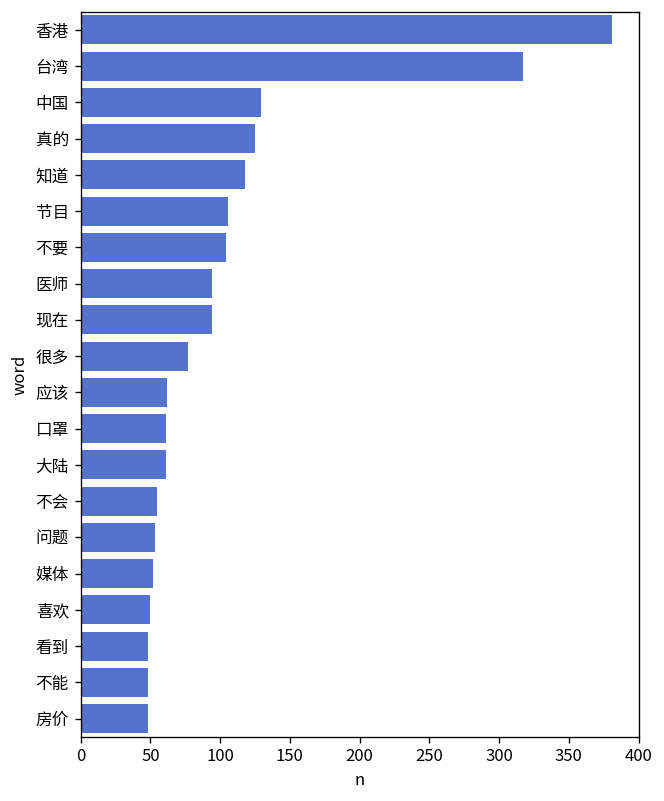

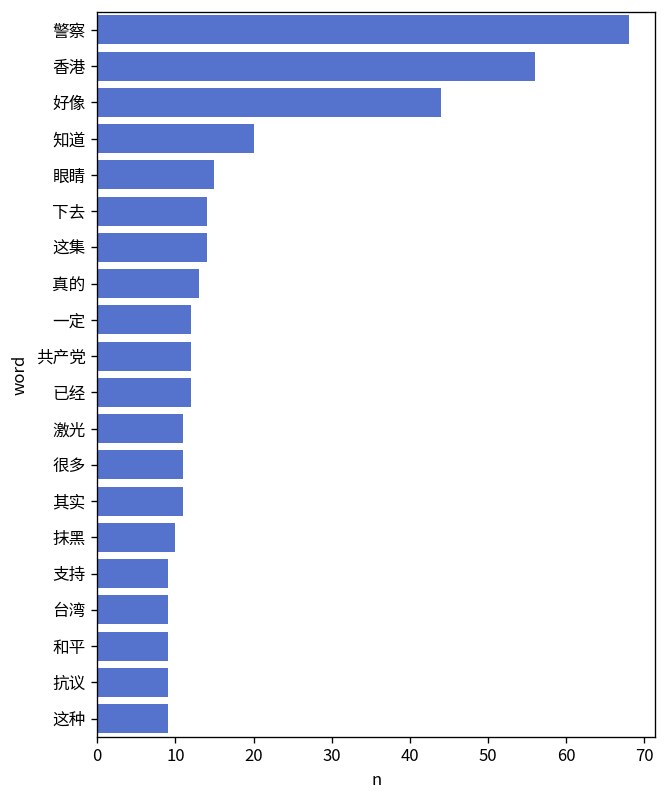

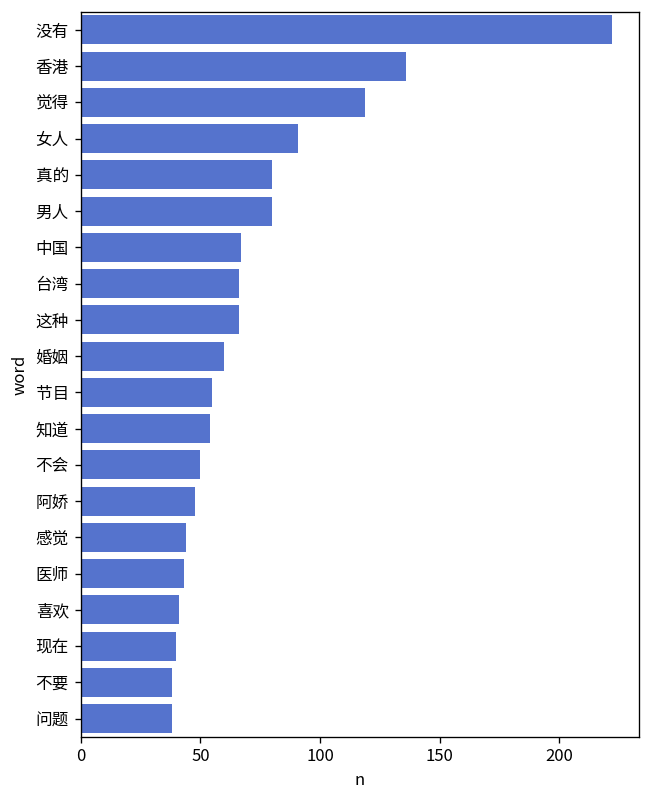

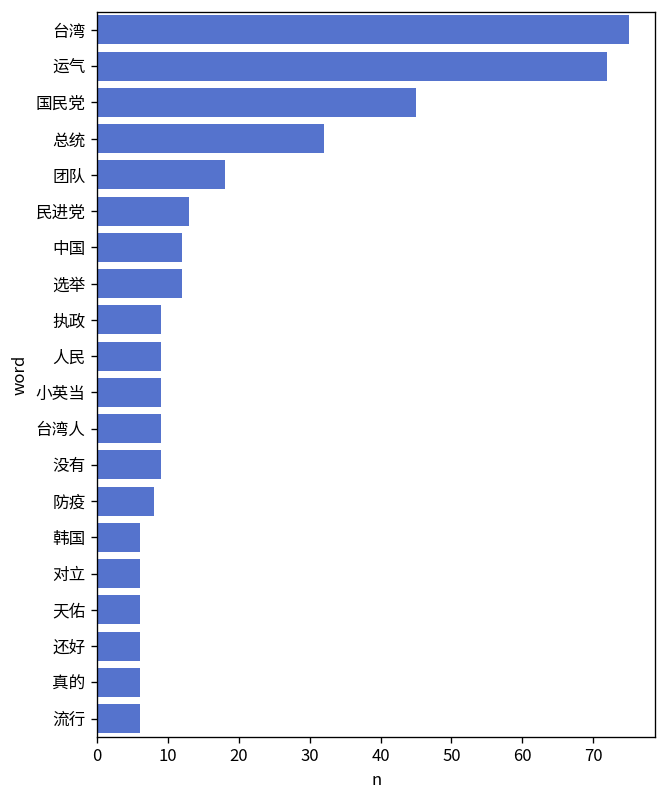

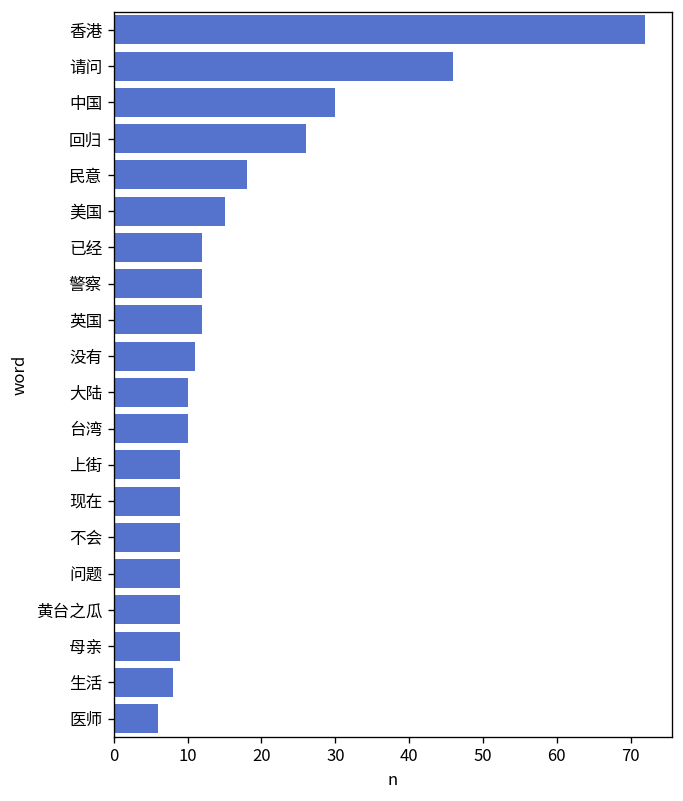

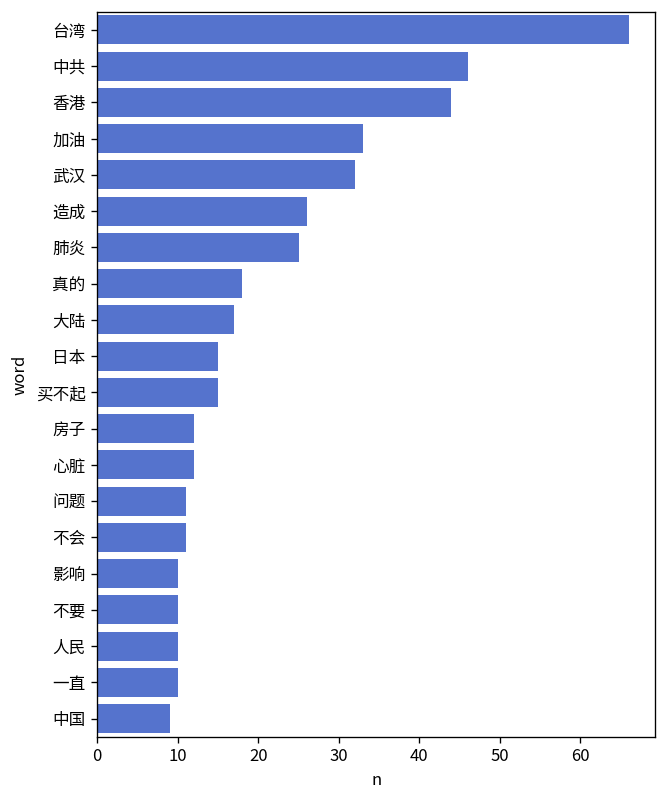

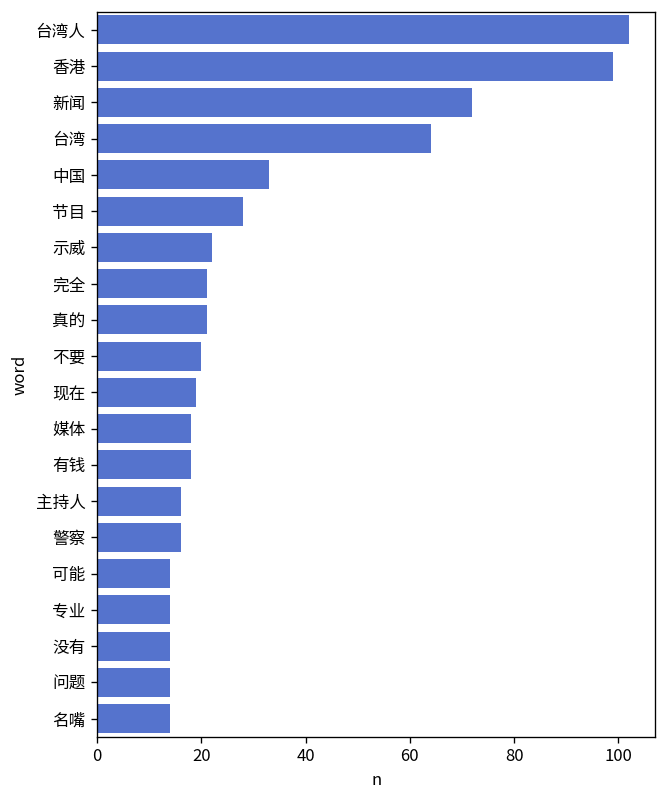

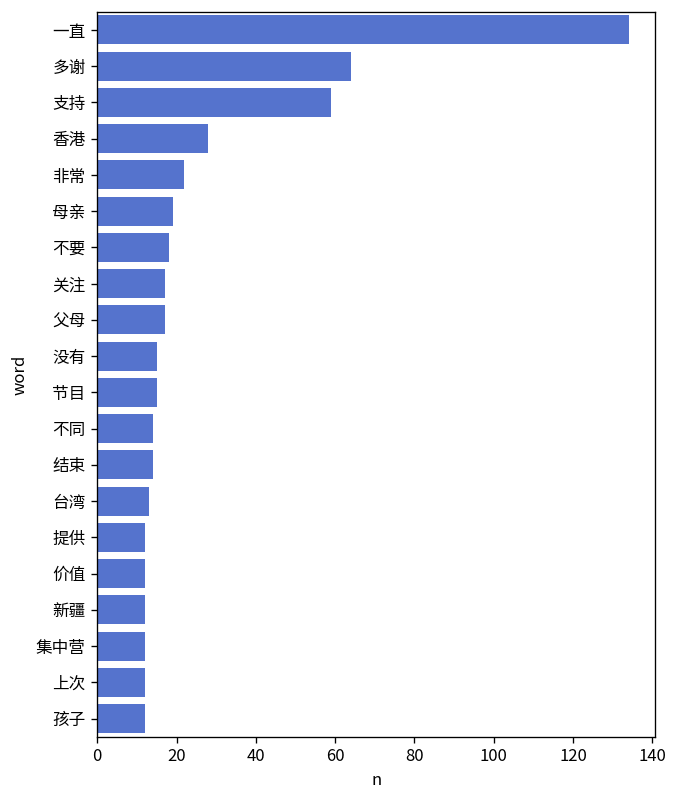

In [21]:
for clu in range(true_k):
    cluster_df = pd.DataFrame(list(cdict[clu].most_common(20)), columns = ['word', 'n'])
    plt.figure(figsize=(6, 8), dpi=120) 
    cluster_data = cluster_df.sort_values('n', ascending=False)
#     print(df_data)
    sns.barplot(x = 'n', 
                y = 'word', 
                data = cluster_data, 
                label = 'word', 
                color = 'royalblue',
               )

## (TODO) Explaining your results
從上述群集的結果，你觀察到有哪些留言群集？請評估你所找出來的關鍵字群集。

(Your Answer here)
在前述篩選策略下，從Evaluating的結果，我選擇以k=8作為群集數。
經視覺化每個群集的關鍵字後，一共發現以下幾大主題:

1. k=0,6: 兩群集主要關鍵字為香港、台灣、中國、新聞、節目、示威、主持人、醫師、媒體，推測與評論反送中相關報導有關。屬於新聞報導主題。
2. k=1: 該群集獨特的關鍵字為警察、眼睛、激光、共產黨，多與描述衝突相關，屬於衝突主題。
3. k=2: 該群集獨特的關鍵字為男人、女人、婚姻、阿嬌，僅婚姻與阿嬌較有辨識度，推測與指涉某人物較為相關，屬於人物主題。
4. k=3: 該群集獨特的關鍵字為國民黨、民進黨、選舉、總統、執政、天佑等，與選舉、口號相關，屬於台灣選舉主題。
5. k=4: 該群集主要的關鍵字為香港、回歸、英國、民意、黃台之瓜等，與討論香港國際地位與歸屬問題相關，屬於國際地位主題。
6. k=5: 該群集主要的關鍵字為武漢、肺炎、日本、買不起、房子等，推測與疫情、民生問題有關，屬於社會民生主題。
7. k=7: 該群集主要的關鍵字為一直、多謝、提供、支持、台灣、價值、新疆、集中營等，看不出關鍵字之間的關聯，屬於其他主題。

有效的主題我認為共有`「衝突（k=1)」、「台灣選舉（k=3）」、「國際地位（k=4）」、「社會民生(k=5)」`等4個主題。大部分的群集都有大量關於中國、台灣、香港的關鍵字被提及，其他關鍵字較為稀少，推測有太多關於反送中的留言僅流於概略描述，導致群集效果不佳。但若是牽涉台灣內部、疫情、警民衝突的討論，由於並無特別分開描述中國、台灣、香港的必要，主題關鍵字的篩選在差異性上就可以看出不同。另外，為增加對於關鍵字的辨識度，刪除點讚數為零與不滿10個字的留言時，刪除了近半數的留言，也導致模型的代表性不佳。

另外，針對上述各主題的關鍵字去iterate dataframe，可以判斷該關鍵字詞頻是由眾多不同來源的評論堆砌而成，還是由單一帳號(可能是網軍)刷出來的。以下以`"激光"`為例: 有特定留言內容一致，且在dataframe中的index非常規律(都差五個index)。

In [22]:
for i in range(len(df4)):
    for y in range(len(df4.loc[i, 'tokenized_text'])):
        if df4.loc[i, 'tokenized_text'][y] == "激光":
            print(df4.loc[i, 'textOriginal'])
            print(i, y)
            break

真的就是公开胡说八道，真不知道这些媒体收了收了多少前，手无寸铁，却手拿尖头伞，激光笔，在机场捆绑记者，阻碍公共交通 ，地铁，公交车，损坏不知道多少公共设施
56 7
@pony ，你点證明? 你有份參與嗎？ 我只信眼睛所見的，已經有警察因為被激光筆所傷而入院
127 9
他們用激光筆傷害警察眼睛，去宿舍丟𥖁，放火，為什麼你們都不提，你們的眼睛都全壞了嗎?
128 0
真的就是公开胡说八道，真不知道这些媒体收了收了多少前，手无寸铁，却手拿尖头伞，激光笔，在机场捆绑记者，阻碍公共交通 ，地铁，公交车，损坏不知道多少公共设施
266 7
@pony ，你点證明? 你有份參與嗎？ 我只信眼睛所見的，已經有警察因為被激光筆所傷而入院
337 9
他們用激光筆傷害警察眼睛，去宿舍丟𥖁，放火，為什麼你們都不提，你們的眼睛都全壞了嗎?
338 0
真的就是公开胡说八道，真不知道这些媒体收了收了多少前，手无寸铁，却手拿尖头伞，激光笔，在机场捆绑记者，阻碍公共交通 ，地铁，公交车，损坏不知道多少公共设施
476 7
@pony ，你点證明? 你有份參與嗎？ 我只信眼睛所見的，已經有警察因為被激光筆所傷而入院
547 9
他們用激光筆傷害警察眼睛，去宿舍丟𥖁，放火，為什麼你們都不提，你們的眼睛都全壞了嗎?
548 0
你知道被示威人 打到住院 留遗言的付国豪记者吗 ？你知道被打到昏迷的96年的小哥哥吗 ？示威者用激光笔照警察诶！可以导致失明！！你知道真相吗？在这误导抹黑香港警察抹黑这些英雄？？？？
2419 10
你知道被示威人 打到住院 留遗言的付国豪记者吗 ？你知道被打到昏迷的96年的小哥哥吗 ？示威者用激光笔照警察诶！可以导致失明！！你知道真相吗？在这误导抹黑香港警察抹黑这些英雄？？？？
2424 10
你知道被示威人 打到住院 留遗言的付国豪记者吗 ？你知道被打到昏迷的96年的小哥哥吗 ？示威者用激光笔照警察诶！可以导致失明！！你知道真相吗？在这误导抹黑香港警察抹黑这些英雄？？？？
2429 10
你知道被示威人 打到住院 留遗言的付国豪记者吗 ？你知道被打到昏迷的96年的小哥哥吗 ？示威者用激光笔照警察诶！可以导致失明！！你知道真相吗？在这误导抹黑香港警察抹黑这些英雄？？？？
2434 10
你知道被示威人 打到住院 留遗言的付国豪记者吗 ？你知道被打到昏迷的96年的小哥哥吗 

## Final Modification (if you have)
經觀察前述群集結果後，我篩除了XXX關鍵字，重新進行群集後所得到的結果為以下幾個主題，分別包含「XXXX（k=0, 1」、「XXXXX（k=2）」、「XXXXX（k=3, 4）」、「」
